<a>而从存储的角度来讲，对tensor的操作又可分为两类：

* 不会修改自身的数据，如 a.add(b)， 加法的结果会返回一个新的tensor。
* 会修改自身的数据，如 a.add_(b)， 加法的结果仍存储在a中，a被修改了。

函数名以_结尾的都是<font color=black>inplace</font>方式,即会修改调用者自己的数据，在实际应用中需加以区分</a>

# 1. create tensor and it's attribute 

In [6]:
import torch as t
a = t.Tensor(2,3)
# 数值取决于内存空间的状态
a

tensor([[ 6.8035e-11,  3.0777e-41,  1.9431e-19],
        [ 4.7429e+30,  5.0938e-14,  0.0000e+00]])

In [5]:
b = t.Tensor([[1,23,4],[5,6,4]])
b

tensor([[  1.,  23.,   4.],
        [  5.,   6.,   4.]])

<font color=blue size=4> tensor to list :</font>
* tensor.tolist()

In [13]:
b.tolist()

[[1.0, 23.0, 4.0], [5.0, 6.0, 4.0]]

In [14]:
print(b.size())

torch.Size([2, 3])


<font color=blue>Tensor中元素个数：</font>
* tensor.numel()
* tensor.nelement()



<font color=blue>
tensor.size()返回torch.Size对象，它是一个tuple的子类</font>
* tensor.size() = tensor.shape

In [12]:
print(t.Tensor(b.size()))
print(t.Tensor((2,3)))


tensor(1.00000e-20 *
       [[-0.6544,  0.0000, -1.1390],
        [ 0.0000,  0.0000,  0.0000]])
tensor([ 2.,  3.])


<font color=red size=4>这里有些不懂：*sizes是什么</font>
<font color=red>t.Tensor(*sizes)创建tensor时，系统不会马上分配空间，只是会计算剩余的内存是否足够使用，使用到tensor时才会分配，而其它操作都是在创建完tensor之后马上进行空间分配。其它常用的创建tensor的方法举例如下。</font>
* class torch.Tensor
* class torch.Tensor(*sizes)
* class torch.Tensor(size)
* class torch.Tensor(sequence)
* class torch.Tensor(ndarray)
* class torch.Tensor(tensor)
* class torch.Tensor(storage)

In [17]:
t.ones(2,3)

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [19]:
t.zeros(2,3)

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [20]:
t.arange(1,6,)

tensor([ 1.,  2.,  3.,  4.,  5.])

In [21]:
t.arange(1,6,1)

tensor([ 1.,  2.,  3.,  4.,  5.])

In [22]:
t.arange(1,6,2)

tensor([ 1.,  3.,  5.])

In [27]:
t.linspace(1,2)

tensor([ 1.0000,  1.0101,  1.0202,  1.0303,  1.0404,  1.0505,  1.0606,
         1.0707,  1.0808,  1.0909,  1.1010,  1.1111,  1.1212,  1.1313,
         1.1414,  1.1515,  1.1616,  1.1717,  1.1818,  1.1919,  1.2020,
         1.2121,  1.2222,  1.2323,  1.2424,  1.2525,  1.2626,  1.2727,
         1.2828,  1.2929,  1.3030,  1.3131,  1.3232,  1.3333,  1.3434,
         1.3535,  1.3636,  1.3737,  1.3838,  1.3939,  1.4040,  1.4141,
         1.4242,  1.4343,  1.4444,  1.4545,  1.4646,  1.4747,  1.4848,
         1.4949,  1.5051,  1.5152,  1.5253,  1.5354,  1.5455,  1.5556,
         1.5657,  1.5758,  1.5859,  1.5960,  1.6061,  1.6162,  1.6263,
         1.6364,  1.6465,  1.6566,  1.6667,  1.6768,  1.6869,  1.6970,
         1.7071,  1.7172,  1.7273,  1.7374,  1.7475,  1.7576,  1.7677,
         1.7778,  1.7879,  1.7980,  1.8081,  1.8182,  1.8283,  1.8384,
         1.8485,  1.8586,  1.8687,  1.8788,  1.8889,  1.8990,  1.9091,
         1.9192,  1.9293,  1.9394,  1.9495,  1.9596,  1.9697,  1.9798,
      

In [29]:
print(t.linspace(1,10).nelement())

100


In [30]:
t.linspace(1,10,3)

tensor([  1.0000,   5.5000,  10.0000])

<font color=red size=4>这里有些不懂：正太分布矩阵</font>

In [34]:
t.randn(2,3)

tensor([[-0.9975,  1.3756, -0.5989],
        [-0.5755,  0.4898,  1.3579]])

In [36]:
# 长度为5的随机排列
t.randperm(5)

tensor([ 2,  1,  0,  4,  3])

In [37]:
t.eye(2,3)

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.]])

# 2. tensor operation

In [61]:
# a.view and a is the same memory
# which means if one change other one will change at the same time
a = t.arange(0,6)

# 当某一维为-1的时候，会自动计算它的大小
b = a.view(-1,3)
print('b:')
print(b)
b.size()

b:
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.]])


torch.Size([2, 3])

<a>改变维度</a>
<font color=red size=4> 这里有点不懂增加维度</font>

In [65]:
print('b.unsqueeze(0):')
print(b.unsqueeze(0))
print(b.unsqueeze(0).size())
print('b.unsqueeze(1):')
print(b.unsqueeze(1))
print(b.unsqueeze(1).size())
b.unsqueeze(-2) # -2表示倒数第二个维度


b.unsqueeze(0):
tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]]])
torch.Size([1, 2, 3])
b.unsqueeze(1):
tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]]])
torch.Size([2, 1, 3])


tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]]])

<a>压缩维度</a>

In [71]:
c = b.reshape(1,1,1,2,3)
c,c.size()

(tensor([[[[[ 0.,  1.,  2.],
            [ 3.,  4.,  5.]]]]]), torch.Size([1, 1, 1, 2, 3]))

In [78]:
#c.squeeze()# 把所有维度为“1”的压缩
c.squeeze(0)# 压缩第0维度 的‘1’, 没有的话就不压缩

torch.Size([2, 2])

In [84]:
a = t.arange(1,7)
b = a.reshape(2,3)
a[1] = 100
b[0][1] = 1
a


tensor([ 1.,  1.,  3.,  4.,  5.,  6.])

## 2.1 index operation

In [86]:
a = t.randn(3,4)

tensor([[-0.3949,  1.9672,  0.6583,  0.2549],
        [ 0.5305,  0.6102, -1.9764,  0.7725],
        [-0.6693,  0.9961, -0.8805,  0.6119]])

In [87]:
a[0]

tensor([-0.3949,  1.9672,  0.6583,  0.2549])

In [88]:
a[:,0]

tensor([-0.3949,  0.5305, -0.6693])

In [91]:
a[0][2] # 第0行第2个元素，等价于a[0, 2]

tensor(0.6583)

In [92]:
a[0,-1]

tensor(0.2549)

In [93]:
a[:2] # 前两行

tensor([[-0.3949,  1.9672,  0.6583,  0.2549],
        [ 0.5305,  0.6102, -1.9764,  0.7725]])

In [94]:
a[:2, 0:2] # 前两行，第一二列

tensor([[-0.3949,  1.9672],
        [ 0.5305,  0.6102]])

In [95]:
print(a[0:1, :2]) # 第0行，前两列 
print(a[0, 0:2])


tensor([[-0.3949,  1.9672]])
tensor([-0.3949,  1.9672])


<a>返回一个bytetensor，其中元素大于1,返回1</a>

In [99]:
a > 1

tensor([[ 0,  1,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]], dtype=torch.uint8)

<a>得到a中大于1的那个element</a>

In [100]:
a[a>1] # 等价于a.masked_select(a>1)
# 选择结果与原tensor不共享内存空间

tensor([ 1.9672])

<a>
常用的一些选择函数:
* index_select(input, dim, index)	在指定维度dim上选取，比如选取某些行、某些列
* masked_select(input, mask)	例子如上，a[a>0]，使用ByteTensor进行选取
* non_zero(input)	非0元素的下标
* gather(input, dim, index)	根据index，在dim维度上选取数据，输出的size与index一样
* scatter_ 是gather的逆操作，注意是inplace
</a>


In [125]:
a = t.arange(0,16).reshape(4,4)
a

tensor([[  0.,   1.,   2.,   3.],
        [  4.,   5.,   6.,   7.],
        [  8.,   9.,  10.,  11.],
        [ 12.,  13.,  14.,  15.]])

In [114]:
index = t.LongTensor([[0,2,2,2]])
a.gather(0, index) 
# 必须传入LongTensor,而且是[[0,2,2,2]]，维度必须一致

tensor([[  0.,   9.,  10.,  11.]])

<a>gather()传入的是0,index是行tensor</a>

In [126]:
# 选取主对角线的元素
index = t.LongTensor([[0,1,2,3]])
a.gather(0, index)

tensor([[  0.],
        [  5.],
        [ 10.],
        [ 15.]])

In [118]:
# 选取副对角线的元素  method1 
index = t.LongTensor([[3,2,1,0]])
a.gather(0, index)

tensor([[ 12.,   9.,   6.,   3.]])

In [128]:
# 选取副对角线的元素  method2
# Tensor.t() 是转置
index = t.LongTensor([[3,2,1,0]]).t()
a.gather(1, index)



tensor([[  3.],
        [  6.],
        [  9.],
        [ 12.]])

In [130]:
# 选取两个对角线的值
index = t.LongTensor([[0,1,2,3],[3,2,1,0]])
b = a.gather(0,index)
b

tensor([[  0.,   5.,  10.,  15.],
        [ 12.,   9.,   6.,   3.]])

In [132]:
c = t.zeros(4,4)
c.scatter_(0, index, b)

tensor([[  0.,   0.,   0.,   3.],
        [  0.,   5.,   6.,   0.],
        [  0.,   9.,  10.,   0.],
        [ 12.,   0.,   0.,  15.]])

In [133]:
x = t.arange(0,27).view(3,3,3)
x

tensor([[[  0.,   1.,   2.],
         [  3.,   4.,   5.],
         [  6.,   7.,   8.]],

        [[  9.,  10.,  11.],
         [ 12.,  13.,  14.],
         [ 15.,  16.,  17.]],

        [[ 18.,  19.,  20.],
         [ 21.,  22.,  23.],
         [ 24.,  25.,  26.]]])

In [ ]:
<font color=red size=4>这里不太懂注释里面的索引是怎么搞得</font>

In [138]:
# x[[1, 2], [1, 2], [2, 0]]
x[1,1,2]和x[2,2,0]

tensor(14.)

<a>tensor的类型[点击这里](https://pytorch.org/docs/stable/tensors.html)
可以通过`torch.set_default_tensor_type`修改tensor的类型,
    例如对于一个size为(1000, 1000, 1000)的FloatTensor，它有1000*1000*1000=10^9个元素，每个元素占32bit/8 = 4Byte内存，所以共占大约4GB内存/显存。HalfTensor是专门为GPU版本设计的，同样的元素个数，显存占用只有FloatTensor的一半，
</a> 

In [140]:
# 设置默认的Tensor类型
# t.set_default_tensor_type('torch.IntTensor')
# 对0.4.0版本,only floating-point types are supported as the default type


In [146]:
b=a.type(t.LongTensor) # 等价于b = a.int()
b.type()

'torch.LongTensor'

In [149]:
a = t.arange(0,5)
b = a
a[0] = 100
b

tensor([ 100.,    1.,    2.,    3.,    4.])

<a>tensor 复制会使其指向同一片内存，是inplace操作，如果要真正的复制，需要tensor.clone()</a>

In [150]:
a = t.arange(0,5)
b = a.clone()
a[0] = 100
b

tensor([ 0.,  1.,  2.,  3.,  4.])

In [160]:
b = a.type(t.LongTensor)
print(a.type())
print(b.type())
c = a.type_as(b)
c.type()

torch.FloatTensor
torch.LongTensor


'torch.LongTensor'

## 2.2 逐元素操作（point-wise, element-wise）


<a>
* abs/sqrt/div/exp/fmod/log/pow..	绝对值/平方根/除法/指数/求余/求幂..
* cos/sin/asin/atan2/cosh..	相关三角函数
* ceil/round/floor/trunc	上取整/四舍五入/下取整/只保留整数部分
* clamp(input, min, max)	超过min和max部分截断
* sigmod/tanh..	激活函数
    
    对于很多操作，例如div、mul、pow、fmod等，PyTorch都实现了运算符重载，所以可以直接使用运算符。如a ** 2 等价于torch.pow(a,2), a  2等价于torch.mul(a,2)。

其中clamp(x, min, max)的输出满足以下公式： $$
y_i =
\begin{cases}
min,  &amp; \text{if  } x_i \lt min \\
x_i,  &amp; \text{if  } min \le x_i \le max  \\
max,  &amp; \text{if  } x_i \gt max\\
\end{cases}
$$clamp常用在某些需要比较大小的地方，如取一个tensor的每个元素与另一个数的较大值。
</a>

In [176]:
a = t.arange(0, 6).view(2,3)
t.cos(a)

tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837]])

<font color=red size=4>这里不明白为什么会变成整数 0,1,2</font>

In [177]:
a % 3 # 等价于t.fmod(a, 3)

tensor([[ 0.,  1.,  2.],
        [ 0.,  1.,  2.]])

In [178]:
a ** 2 # 等价于t.pow(a, 2)

tensor([[  0.,   1.,   4.],
        [  9.,  16.,  25.]])

In [179]:
# 取a中的每一个元素与3相比较大的一个 (小于3的截断成3)
print(a)
t.clamp(a, min=3)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.]])


tensor([[ 3.,  3.,  3.],
        [ 3.,  4.,  5.]])

## 2.3 归并操作

<a>
* mean/sum/median/mode	均值/和/中位数/众数
* norm/dist	范数/距离
* std/var	标准差/方差
* cumsum/cumprod	累加/累乘
</a>
以上大多数函数都有一个参数dim，用来指定这些操作是在哪个维度上执行的。关于dim(对应于Numpy中的axis)的解释众说纷纭，这里提供一个简单的记忆方式：

假设输入的形状是(m, n, k)

* 如果指定dim=0，输出的形状就是(1, n, k)或者(n, k)
* 如果指定dim=1，输出的形状就是(m, 1, k)或者(m, k)
* 如果指定dim=2，输出的形状就是(m, n, 1)或者(m, n)

默认keepdim=False

size中是否有"1"，取决于参数keepdim，keepdim=True会保留维度1。注意，以上只是经验总结，并非所有函数都符合这种形状变化方式，如cumsum。

In [186]:
b = t.ones(2,3)
print(b)
print(b.sum(dim=0, keepdim=True))
print(b.sum(dim=0, keepdim=True).size())

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])
tensor([[ 2.,  2.,  2.]])
torch.Size([1, 3])


In [187]:
b = t.ones(2,3)
print(b)
print(b.sum(dim=0, keepdim=False))
print(b.sum(dim=0, keepdim=False).size())

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])
tensor([ 2.,  2.,  2.])
torch.Size([3])


In [188]:
b.sum(dim=1)

tensor([ 3.,  3.])

In [191]:
a = t.arange(0,6).view(2,3)
print(a)
a.cumsum(dim=1) # 沿着行累加

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.]])


tensor([[  0.,   1.,   3.],
        [  3.,   7.,  12.]])

In [192]:
a = t.arange(0,6).view(2,3)
print(a)
a.cumsum(dim=0) # 沿着列累加

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.]])


tensor([[ 0.,  1.,  2.],
        [ 3.,  5.,  7.]])

## 2.4 比较
常用函数:
<a>
* gt/lt/ge/le/eq/ne	大于/小于/大于等于/小于等于/等于/不等
* topk	最大的k个数
* sort	排序
* max/min	比较两个tensor最大最小值
    
    
    表中第一行的比较操作已经实现了运算符重载，因此可以使用a>=b、a>b、a!=b、a==b，其返回结果是一个ByteTensor，可用来选取元素。max/min这两个操作比较特殊，以max来说，它有以下三种使用情况：

* t.max(tensor)：返回tensor中最大的一个数
* t.max(tensor,dim)：指定维上最大的数，返回tensor和下标
* t.max(tensor1, tensor2): 比较两个tensor相比较大的元素

至于比较一个tensor和一个数，可以使用clamp函数。下面举例说明。
</a>

In [201]:
a = t.linspace(0,15,6).view(2,3)
a

tensor([[  0.,   3.,   6.],
        [  9.,  12.,  15.]])

In [197]:
b = t.linspace(15,0,6).view(2,3)
b

tensor([[ 15.,  12.,   9.],
        [  6.,   3.,   0.]])

In [202]:
a>b

tensor([[ 0,  0,  0],
        [ 1,  1,  1]], dtype=torch.uint8)

In [203]:
a[a>b] # a中大于b的元素

tensor([  9.,  12.,  15.])

In [204]:
t.max(a)

tensor(15.)

In [207]:
t.max(b, dim=1)
# 第一个返回值的15和6分别表示第0行和第1行最大的元素
# 第二个返回值的0和0表示上述最大的数是该行第0个元素

(tensor([ 15.,   6.]), tensor([ 0,  0]))

In [208]:
t.max(a,b)

tensor([[ 15.,  12.,   9.],
        [  9.,  12.,  15.]])

In [209]:
# 比较a和10较大的元素
t.clamp(a, min=10)

tensor([[ 10.,  10.,  10.],
        [ 10.,  12.,  15.]])

## 2.5 线性代数
<a>
常见的线性代数函数：
* trace	对角线元素之和(矩阵的迹)
* diag	对角线元素
* triu/tril	矩阵的上三角/下三角，可指定偏移量
* mm/bmm	矩阵乘法，batch的矩阵乘法
* addmm/addbmm/addmv/addr/badbmm..	矩阵运算
* t	转置
* dot/cross	内积/外积
* inverse	求逆矩阵
* svd	奇异值分解     
    
<font color=red>需要注意的是，矩阵的转置会导致存储空间不连续，需调用它的.contiguous方法将其转为连续。</font>
</a>

In [210]:
b = a.t()
b.is_contiguous()

False

In [211]:
b = b.contiguous()

In [212]:
b.is_contiguous()

True

## 3.Tensor & Numpy
<a>Tensor和Numpy是共享内存，而且二者的转换的效率很小</a>


In [3]:
import numpy as np
a = np.ones([2,3],dtype=np.float32)
a

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [214]:
b = t.from_numpy(a)
b

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [215]:
a[0,1] = 100
b

tensor([[   1.,  100.,    1.],
        [   1.,    1.,    1.]])

In [9]:
a = np.ones([2,3])
a.dtype

dtype('float64')

<a>
    <font color=red>
        注意：当numpy的数据类型和Tensor的类型不一样的时候，数据会被复制，不会共享内存。
    </font>
</a>

In [10]:
b = t.Tensor(a)
b.type()

'torch.FloatTensor'

In [11]:
c = t.from_numpy(a)
c.type()

'torch.DoubleTensor'

In [16]:
a[0,1] = 5
print(a)
print(b)
# 所以 c与a共享内存，b与a不共享内存

[[5. 5. 5.]
 [1. 1. 1.]]
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])


<a>numpy的自动广播原则：
* 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分通过在前面加1补齐
* 两个数组要么在某一个维度的长度一致，要么其中一个为1，否则不能计算
* 当输入数组的某个维度的长度为1时，计算时沿此维度复制扩充成一样的形状

pytorch 已经实现了自动广播，但是为了直观，通过两个函数组合，手动实现广播法则，而且不易出错:
* unsqueeze或者view：为数据某一维的形状补1，实现法则1
* expand或者expand_as，重复数组，实现法则3；该操作不会复制数组，所以不会占用额外的空间

注意，repeat实现与expand相类似的功能，但是repeat会把相同数据复制多份，因此会占用额外的空间。
</a>





In [18]:
# 本来a,b两个tensor维度是不同的，但是通过自动广播可以实现相加
a = t.ones(3,2)
b = t.zeros(2,3,1)
# 自动广播法则
# 第一步：a是2维,b是3维，所以先在较小的a前面补1 ，
#               即：a.unsqueeze(0)，a的形状变成（1，3，2），b的形状是（2，3，1）,
# 第二步:   a和b在第一维和第三维形状不一样，其中一个为1 ，
#               可以利用广播法则扩展，两个形状都变成了（2，3，2）
print(a)
print(b)
a + b

tensor([[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]])
tensor([[[ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.]]])


tensor([[[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]],

        [[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]]])

In [24]:
# 手动广播法则
# a.reshape(1,3,2).expand(2,3,2)+b.expand(2,3,2)
# a.unsqueeze(0).expand(2, 3, 2) + b.expand(2,3,2)
a.view(1,3,2).expand(2, 3, 2) + b.expand(2,3,2)

tensor([[[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]],

        [[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]]])

In [26]:
# expand不会占用额外空间，只会在需要的时候才扩充，可极大节省内存
e = a.unsqueeze(0).expand(10000000000000, 3,2)
# 如果print(e) 会发生  RuntimeError：not enough memory

RuntimeError: $ Torch: not enough memory: you tried to allocate 447034GB. Buy new RAM! at /opt/conda/conda-bld/pytorch_1525909934016/work/aten/src/TH/THGeneral.c:218

# 4. Tensor的内部结构

tensor的数据结构如图3所示。tensor分为头信息区(Tensor)和存储区(Storage)，信息区主要保存着tensor的形状（size）、步长（stride）、数据类型（type）等信息，而真正的数据则保存成连续数组。由于数据动辄成千上万，因此信息区元素占用内存较少，主要内存占用则取决于tensor中元素的数目，也即存储区的大小。



一般来说一个tensor有着与之相对应的storage, storage是在data之上封装的接口，便于使用，而不同tensor的头信息一般不同，但却可能使用相同的数据。下面看两个例子。

In [29]:
a = t.arange(0,6)
a.storage()


 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
[torch.FloatStorage of size 6]

In [30]:
b = a.view(2, 3)
b.storage()

 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
[torch.FloatStorage of size 6]

In [31]:
# 一个对象的id值可以看作它在内存中的地址
# storage的内存地址一样，即是同一个storage
id(b.storage()) == id(a.storage())

True

In [33]:
c = a[2:]
c.storage()


 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
[torch.FloatStorage of size 6]

In [34]:
c.data_ptr(), a.data_ptr()
# 可以看出相差8，这是因为2*4=8--相差两个元素，每个元素占4个字节(float)

(140632060336200, 140632060336192)

In [35]:
c[0] = -100 # c[0]的内存地址对应a[2]的内存地址
a

tensor([   0.,    1., -100.,    3.,    4.,    5.])

In [43]:
d = t.Tensor(c.storage())
d[0] = 666
a,b,c,d

(tensor([ 666.,    1., -100.,    3.,    4.,    5.]),
 tensor([[ 666.,    1., -100.],
         [   3.,    4.,    5.]]),
 tensor([-100.,    3.,    4.,    5.]),
 tensor([ 666.,    1., -100.,    3.,    4.,    5.]))

In [44]:
# a,b,c,d共享storage
id(a.storage()) == id(b.storage()) == id(c.storage()) == id(d.storage())

True

In [45]:
a.storage_offset(), c.storage_offset(), d.storage_offset()

(0, 2, 0)

<font color=red size=4>这里有点不懂为什么b[::2, ::2] # 隔2行/列取一个元素
    和b.stride(), e.stride()
</font>

In [48]:
e = b[::2, ::2] # 隔2行/列取一个元素
b.stride(), e.stride()

((3, 1), (6, 2))

In [49]:
id(e.storage()) == id(a.storage())

True

In [50]:
e.is_contiguous()

False

可见绝大多数操作并不修改tensor的数据，而只是修改了tensor的头信息。这种做法更节省内存，同时提升了处理速度。在使用中需要注意。 此外有些操作会导致tensor不连续，这时需调用tensor.contiguous方法将它们变成连续的数据，该方法会使数据复制一份，不再与原来的数据共享storage。 另外读者可以思考一下，之前说过的高级索引一般不共享stroage，而普通索引共享storage，这是为什么？（提示：普通索引可以通过只修改tensor的offset，stride和size，而不修改storage来实现）


<a>保存和转移Tensor</a>


使用t.save和t.load即可完成相应的功能。在save/load时可指定使用的pickle模块，在load时还可将GPU tensor映射到CPU或其它GPU上。

In [ ]:
if t.cuda.is_available():
    a = a.cuda(1) # 把a转为GPU1上的tensor,
    t.save(a,'a.pth')
    
   # 加载为b, 存储于GPU1上(因为保存时tensor就在GPU1上)
    b = t.load('a.pth')
    # 加载为c, 存储于CPU
    c = t.load('a.pth', map_location=lambda storage, loc: storage)
    # 加载为d, 存储于GPU0上
    d = t.load('a.pth', map_location={'cuda:1':'cuda:0'})

<a>向量化</a>

向量化
向量化计算是一种特殊的并行计算方式，相对于一般程序在同一时间只执行一个操作的方式，它可在同一时间执行多个操作，通常是对不同的数据执行同样的一个或一批指令，或者说把指令应用于一个数组/向量上。向量化可极大提高科学运算的效率，Python本身是一门高级语言，使用很方便，但这也意味着很多操作很低效，尤其是for循环。<font color=red>在科学计算程序中应当极力避免使用Python原生的for循环。</font>

In [52]:
def for_loop_add(x,y):
    result = []
    for i,j in zip(x,y):
        result.append(i+j)
    return t.Tensor

In [57]:
x = t.zeros(100)
y = t.ones(100)
%timeit -n 10 for_loop_add(x, y)
%timeit -n 10 x + y

460 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 22.31 times longer than the fastest. This could mean that an intermediate result is being cached.
6.9 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<a>此外还有以下几点需要注意：

* 大多数t.function都有一个参数out，这时候产生的结果将保存在out指定tensor之中。
* t.set_num_threads可以设置PyTorch进行CPU多线程并行计算时候所占用的线程数，这个可以用来限制PyTorch所占用的CPU数目。
* t.set_printoptions可以用来设置打印tensor时的数值精度和格式。 下面举例说明。</a>

In [64]:
a = t.arange(0, 20000000)
a = a.type(t.IntTensor)
print(a[-1], a[-2]) # 32bit的IntTensor精度有限导致溢出
b = t.LongTensor()
t.arange(0, 200000, out=b) # 64bit的LongTensor不会溢出
b[-1],b[-2]

tensor(1.6777e+07, dtype=torch.int32) tensor(1.6777e+07, dtype=torch.int32)


(tensor(2.0000e+05), tensor(2.0000e+05))

In [67]:
a = t.randn(2,3)
a

tensor([[ 1.8264,  0.4908,  1.0240],
        [ 0.3769, -0.0968, -1.1596]])

In [68]:
matpt.set_printoptions(precision=10)
a

tensor([[1.8263800144, 0.4907606542, 1.0239660740],
        [0.3768585324, -0.0968415365, -1.1595524549]])

In [4]:
import torch as t
import matplotlib.pyplot as plt
from IPython import display

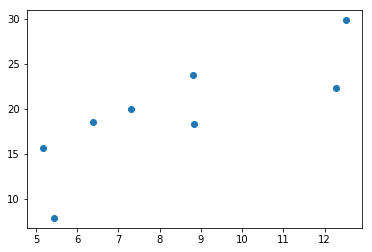

In [9]:
t.manual_seed(1000)
def get_fake_data(batch_size=8):
    '''产生随机数据：y=2*2+3,加上一些噪声'''
    x = t.rand(batch_size,1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1))*3
    return x,y
x,y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

In [17]:

# 随机初始化参数# 随机初始化参数
w = t.rand(1, 1) 
b = t.zeros(1, 1)

lr =0.001 # 学习率



torch.Size([8, 1])

tensor([ 1.,  2.,  3.,  4.])